# Step 1: Import the relevant libraries such as numpy, pandas, train_test_split,

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from itertools import combinations


# Step 2:  Read the dataset chosen and check for null data

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

df = pd.read_csv(path + r"\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


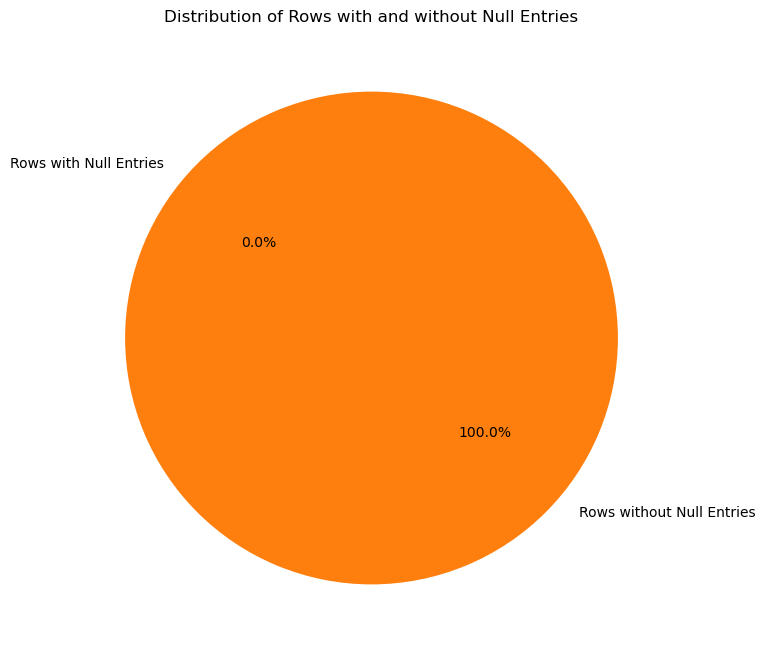

In [77]:
rows_with_null = df.isnull().any(axis=1)

# Count rows with and without null entries
null_counts = {
    "Rows with Null Entries": rows_with_null.sum(),
    "Rows without Null Entries": (~rows_with_null).sum()
}

# Draw a pie chart
plt.figure(figsize=(8, 8))
plt.pie(null_counts.values(), labels=null_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Rows with and without Null Entries")
plt.show()

# Step 3: Visualize the data with distinct suitable plots.  

First we check if the dataset is balanced or not. Our target varaible is species. We begin by checking how many classes are there in the data. Checking what features we have is also part of EDA.

In [78]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [79]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

{'Iris Setosa': 50, 'Iris Versicolor': 50, 'Iris Virginica': 50}


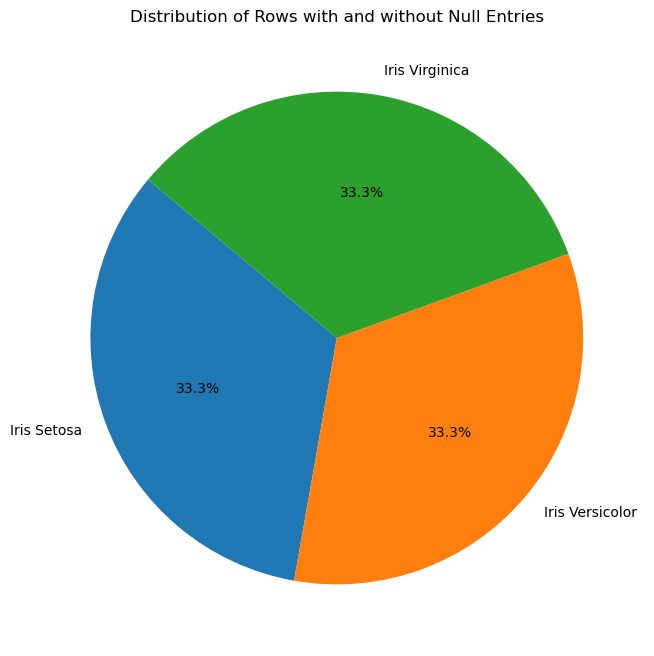

In [80]:
iris_setosa = df[df["Species"] == "Iris-setosa"]
iris_versicolor = df[df["Species"] == "Iris-versicolor"]
iris_virginica = df[df["Species"] == "Iris-virginica"]

species_counts = {
    "Iris Setosa": len(iris_setosa),
    "Iris Versicolor": len(iris_versicolor),
    "Iris Virginica": len(iris_virginica)
}

print(species_counts)

plt.figure(figsize=(8, 8))
plt.pie(species_counts.values(), labels=species_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Rows with and without Null Entries")
plt.show()

Out of the given features, Petal Length, Petal Width, Sepal Width and Sepal Length are the ones which can be used to predict what class the species belongs to. We can't use Id to classify the species. Since we can't visualize in 4 dimensions we draw all the plots with 2 features.

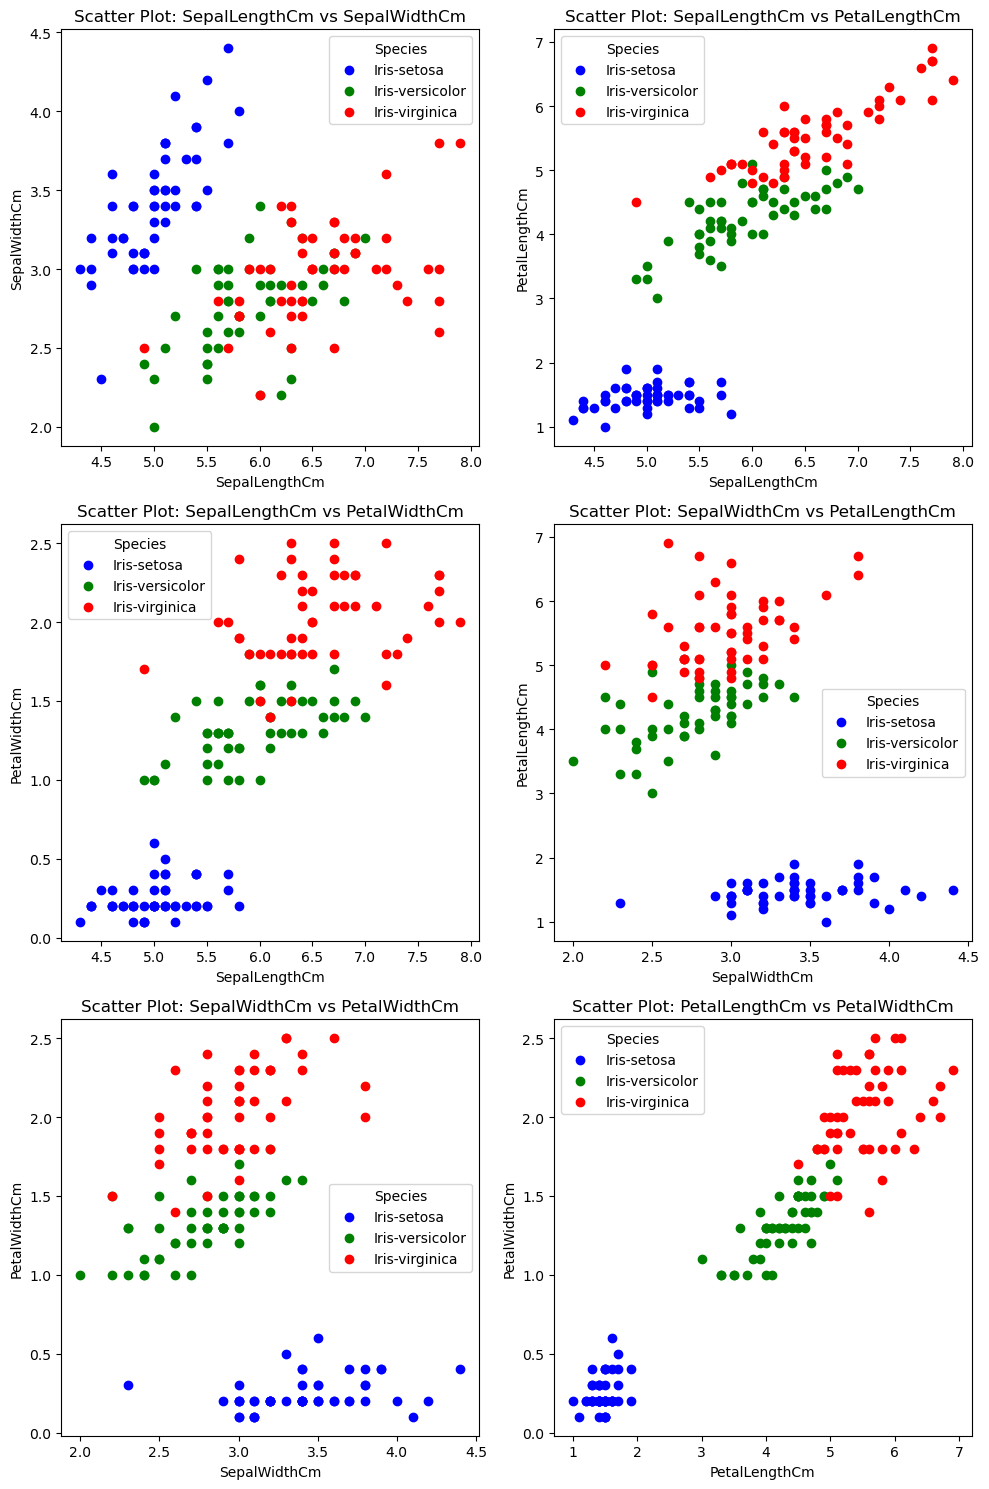

In [81]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create combinations of the features (pairs)
feature_pairs = list(combinations(features, 2))

# Set up the colors for each category (species)
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Create subplots
num_plots = len(feature_pairs)
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2), ncols=2, figsize=(10, 5*num_plots//2))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each pair of features
for i, (feature_1, feature_2) in enumerate(feature_pairs):
    ax = axes[i]
    
    # Loop through each category (species)
    for category in df['Species'].unique():
        subset = df[df['Species'] == category]
        ax.scatter(subset[feature_1], subset[feature_2], label=category, color=colors[category])
    
    # Adding labels and title for each subplot
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_title(f'Scatter Plot: {feature_1} vs {feature_2}')
    ax.legend(title='Species')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Observations: 
* Dataset is perfectly balanced.
* Iris Setosa is easily distinguishable from other species.
* All species can be seperated easily by linear boundaries

# Step 4: Perform feature scaling. Identify the response variable and explanatory variables.  

1. Response variable or target variable here is Species
2. Explanatory variables or features are PetalLengthCm, SepalLengthCm, PetalWidthCm and SepalWidthCm.

We will perform MaxMinScaling or normalization for feature scaling.

In [82]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa


# Step 5: Convert any string data to numerical data using suitable conversion  

Here we don't have NLP data. We only have fixed 3 categories in our target variable which are strings. Hence we will not use techniques like converting to embeddings. We go for simple mapping. Note that one-hot encoding could be used in this scenario as well.

In [83]:
species_mapping = {"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2}
df["Species"] = df["Species"].map(species_mapping)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,0
1,2,0.166667,0.416667,0.067797,0.041667,0
2,3,0.111111,0.500000,0.050847,0.041667,0
3,4,0.083333,0.458333,0.084746,0.041667,0
4,5,0.194444,0.666667,0.067797,0.041667,0


# Step 6: Split the data into train data and test data

In [84]:
from sklearn.model_selection import train_test_split

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.size

480

# Step 7: Train the Machine learning model using training data. Note: You can use any ML algorithm.   

From the plots obtained during EDA, we can conclude that there may exist a hyperplane that can easily classify the species. Hence we will use SVM linear classifier model. We can use SVC Binary classifier to classify Iris setosa (blue dots) from other species. The other two species will then be classfied further using another SVM Binary classifier. This is because Iris setosa in all the plots is easily distinguishable from the other species.

In [86]:
svc = SVC(kernel='linear', decision_function_shape='ovr')
svc.fit(X_train, y_train)

c:\Users\97433\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Step 8: Predict the output for the test data using the fitted model  

In [87]:
y_pred = svc.predict(X_test)

# Step 9: Determine the performance of the model using suitable metric (List various metrics to analyze the performance of the regressor/classifier and write inference why you have chosen one that you are using in your code).  

We have choosen Accuracy, Precision, Recall and F1 score. Although since this is a balanced dataset accuracy is enough. However these are the standard metrics used for classification tasks.

* Accuracy: Gives a general measure of performance.
* Precision: Useful when the cost of false positives is high.
* Recall: Important when the cost of false negatives is high.
* F1 Score: Provides a balance between precision and recall.

In [88]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")

Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
